In [363]:
# 모듈로딩

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import myFuncLib.mygraph as mygraph

In [364]:
# 파일경로

FILE_PATH = './DATA/space/train.csv'
spaceDF = pd.read_csv(FILE_PATH)
spaceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


- PassengerId- 각 승객에 대한 고유한 ID. 각 ID는 승객이 함께 여행하는 그룹을 나타내는 형식을 취하며, gggg_pp그룹 내의 번호입니다. 그룹에 속한 사람들은 종종 가족이지만 항상 그런 것은 아닙니다.ggggpp
- HomePlanet- 승객이 출발한 행성, 일반적으로 영주권이 있는 행성입니다.
- CryoSleep- 승객이 항해 기간 동안 정지된 애니메이션 상태에 들어가도록 선택했는지 여부를 나타냅니다. 냉동 수면 상태의 승객은 객실에 갇힙니다.
- Cabin- 승객이 머물고 있는 객실 번호. 형식을 취하며 deck/num/side, 여기서는 Port 또는 Starboard 중 하나 를side 사용할 수 있습니다 .PS
- Destination- 승객이 하선할 행성.
- Age- 승객의 나이.
- VIP- 승객이 항해 중 특별 VIP 서비스에 대한 비용을 지불했는지 여부.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- 승객이 타이타닉호의 다양한 고급 편의시설에 대해 청구한 금액입니다.
- Name- 승객의 성과 이름.
- Transported- 승객이 다른 차원으로 이동했는지 여부. 이것이 타겟이고, 당신이 예측하려는 열입니다.

In [365]:
# 중복값 체크
spaceDF.duplicated().sum()

0

In [366]:
# NAN 체크
spaceDF.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [367]:
# 전부 중복인 값, 한개라도 중복인값 체크
# 대부분 각 컬럼별 결측치, 삭제아닌 최대한 채우기로 결정
spaceDF.isna().all(axis=1).sum(), spaceDF.isna().any(axis=1).sum()

(0, 2087)

In [368]:
# 모든 금액이 결측치인 데이터 체크 없으므로 개인별 총 지불한 금액 평균치를 대입하기로 결정
space_cols =spaceDF.columns[[7,8,9,10,11]].to_list()
spaceDF[space_cols].isna().all(axis=1).sum()

0

In [369]:
# 개인별 지불한 금액 평균치로 지정 대입
for col in space_cols:
    pId = spaceDF.loc[spaceDF[col].isna(),'PassengerId']
    for idx in pId:
        p = spaceDF['PassengerId'] == idx
        spaceDF.loc[p,col] = spaceDF.loc[p,space_cols].mean(axis=1)
        print(spaceDF.loc[p,col])

25    0.0
Name: RoomService, dtype: float64
35    685.0
Name: RoomService, dtype: float64
83    0.0
Name: RoomService, dtype: float64
132    24.25
Name: RoomService, dtype: float64
170    270.0
Name: RoomService, dtype: float64
220    222.0
Name: RoomService, dtype: float64
233    0.0
Name: RoomService, dtype: float64
280    1236.75
Name: RoomService, dtype: float64
319    473.5
Name: RoomService, dtype: float64
368    430.0
Name: RoomService, dtype: float64
400    0.0
Name: RoomService, dtype: float64
401    1918.5
Name: RoomService, dtype: float64
444    73.75
Name: RoomService, dtype: float64
448    83.0
Name: RoomService, dtype: float64
550    58.25
Name: RoomService, dtype: float64
568    196.75
Name: RoomService, dtype: float64
637    1776.0
Name: RoomService, dtype: float64
646    189.0
Name: RoomService, dtype: float64
820    663.25
Name: RoomService, dtype: float64
889    0.0
Name: RoomService, dtype: float64
905    10.0
Name: RoomService, dtype: float64
908    1.333333
Name: 

In [370]:
# 결측치가 데이터의 2% 정도이기에 만약 최빈값이 1000개가 넘어간다면 최빈값으로 치환
def mode_fill(colname):
    mod_d = spaceDF[colname].mode().values[0]
    mod_cnt = spaceDF.loc[spaceDF[colname] == mod_d,colname].count()
    if int(mod_cnt) > 1000:
        print(colname,': 최빈값으로 치환 개꿀')
        spaceDF[colname].fillna(mod_d,inplace=True)
    else:
        print(colname,': 치환안됨')
    print(f'최빈값 개수:{mod_cnt}, 최빈값: {mod_d}')
    print()
mode_fill('HomePlanet')
mode_fill('CryoSleep')
mode_fill('Cabin')
mode_fill('Destination')

HomePlanet : 최빈값으로 치환 개꿀
최빈값 개수:4602, 최빈값: Earth

CryoSleep : 최빈값으로 치환 개꿀
최빈값 개수:5439, 최빈값: False

Cabin : 치환안됨
최빈값 개수:8, 최빈값: G/734/S

Destination : 최빈값으로 치환 개꿀
최빈값 개수:5915, 최빈값: TRAPPIST-1e



In [371]:
# 최빈값 너무 작음 각데이터 연관성 찾힘힘든 8700개 데이터중 200개이기에 삭제 결정
spaceDF['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [372]:
# 방에 대한 데이터 확인불가, 삭제
spaceDF.drop(index=spaceDF[spaceDF['Cabin'].isna()].index,inplace=True)

<Axes: >

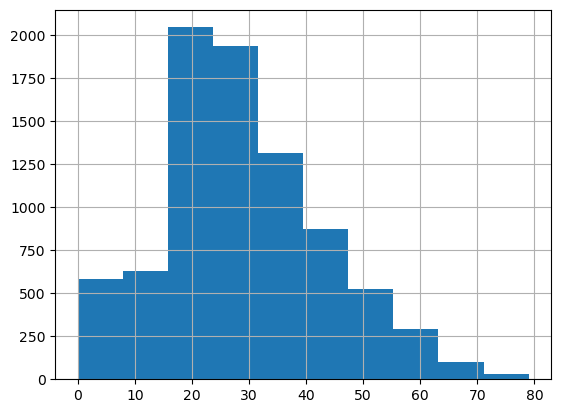

In [373]:
# 연령별 분포도 히스토그램, 딱히 문제없으므로 평균치대입
spaceDF['Age'].hist()

In [374]:
# 나이 평균치 대입
spaceDF.loc[spaceDF['Age'].isna(),'Age'] = spaceDF['Age'].mean()

In [375]:
# VIP 멤버들이 평균적으로 사용한 금액 추출
vipCut = spaceDF.loc[spaceDF['VIP'] == True,space_cols].mean(axis=1).mean()

In [387]:
vipidx = spaceDF.loc[spaceDF['VIP'].isna(),'PassengerId']
# VIP 멤버들이 평균적으로 사용한 금액이상으로 썻다면 VIP로 대입
for idx in vipidx:
    h_m = spaceDF.loc[spaceDF['PassengerId'] == idx,space_cols].mean(axis=1).values[0]
    if h_m >= vipCut:
        spaceDF.loc[spaceDF['PassengerId'] == idx,'VIP'] = 'True'
    else:
        spaceDF.loc[spaceDF['PassengerId'] == idx,'VIP'] = 'False'

In [388]:
# 결측치 체크
spaceDF.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            198
Transported       0
dtype: int64

In [392]:
# 안쓰는 컬럼 삭제
spaceDF.drop(columns='PassengerId',inplace=True)
spaceDF.drop(columns='Name',inplace=True)

KeyError: "['PassengerId'] not found in axis"

In [391]:
spaceDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8494 non-null   object 
 1   CryoSleep     8494 non-null   bool   
 2   Cabin         8494 non-null   object 
 3   Destination   8494 non-null   object 
 4   Age           8494 non-null   float64
 5   VIP           8494 non-null   object 
 6   RoomService   8494 non-null   float64
 7   FoodCourt     8494 non-null   float64
 8   ShoppingMall  8494 non-null   float64
 9   Spa           8494 non-null   float64
 10  VRDeck        8494 non-null   float64
 11  Transported   8494 non-null   bool   
dtypes: bool(2), float64(6), object(4)
memory usage: 746.5+ KB
